<a href="https://colab.research.google.com/github/shintatriya1/sentimen/blob/master/Skripsi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install Sastrawi

     |████████████████████████████████| 215kB 5.0MB/s 


In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv('https://raw.githubusercontent.com/shintatriya1/analisa_sentimen/master/datalirik3b.csv')

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['label'] = df['label'].map({'positif': 0, 'negatif': 1}) 
df.head(10)

,label,text
0,0,Lihat cara dia berjalan Oh mengagumkan oh meng...
1,0,Ketika ku mendengar bahwa Kini kau tak lagi de...
2,0,Sudah lupakan semua Segala salahku Dan bila ka...
3,0,Cinta satukan hati Kuatkan jiwa menghadapi dun...
4,0,Betapa bahagianya hatiku saat Ku duduk berdua ...
5,0,Cantik Ingin rasa hati berbisik Untuk melepas ...
6,0,Terbacakah hatiku isyaratkan suka Tersiratkah ...
7,0,Dering telponku membuatku tersenyum di pagi ha...
8,0,Deras hujan yang turun Mengingatkanku pada dir...
9,0,Kutuliskan kenangan tentang caraku menemukan d...


In [0]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 

#Create factory
stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan', 'ia','bahwa','oleh','apa','kau','tak']
 
# Tambahkan Stopword Baru
data = stop_factory.get_stop_words()+more_stopword
 
stopword = stop_factory.create_stop_word_remover()

['nama', 'cinta', 'sama', 'rasa', 'lama', 'nama', 'cinta', 'sama', 'rasa', 'panjang', 'usia', 'hingga', 'tiba', 'aku', 'lihat', 'cinta', 'khianat', 'cinta', 'khianat', 'aku', 'jatuh', 'tak', 'bangkit', 'aku', 'tenggelam', 'laut', 'luka', 'aku', 'sesat', 'tak', 'tahu', 'arah', 'jalan', 'pulang', 'aku', 'butir', 'debu', 'nama', 'cinta', 'sama', 'rasa', 'lama', 'nama', 'cinta', 'sama', 'rasa', 'panjang', 'usia', 'hingga', 'tiba', 'aku', 'lihat', 'cinta', 'khianat', 'cinta', 'khianat', 'ooh', 'tepi', 'menep', 'jauh', 'semua', 'jadi', 'ooh', 'aku', 'jatuh', 'tak', 'bangkit', 'aku', 'tenggelam', 'laut', 'luka', 'aku', 'sesat', 'tak', 'tahu', 'arah', 'jalan', 'pulang', 'aku', 'butir', 'debu']


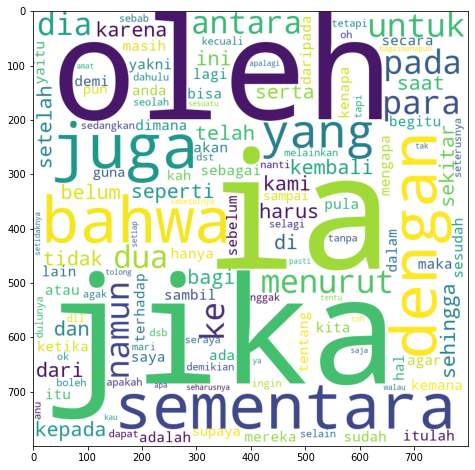

In [26]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
for i, kalimat in enumerate (df['text']):
   stop = nltk.tokenize.word_tokenize(kalimat)
for i in range(len(stop)):
    stop[i]=stopword.remove(stop[i].lower())
print(stop)
comment_words = ' '
for words in data:
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800,
                       background_color = 'white',
                       min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)

In [20]:
X= df['text']
y = df['label']  
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
#Naive Bayes Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred
knn.predict_proba(X_test)
print(confusion_matrix(y_test, y_pred))

[[ 2 12]
 [ 0 16]]


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       0.57      1.00      0.73        16

    accuracy                           0.60        30
   macro avg       0.79      0.57      0.49        30
weighted avg       0.77      0.60      0.50        30



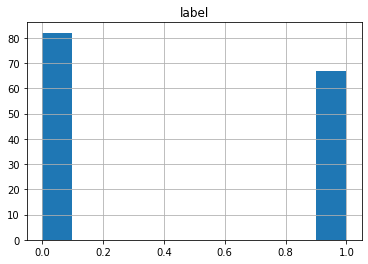

In [22]:
df.hist()
 
plt.show()